## STEP-1: Importing right modules

##Assignment Details
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same.



###Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


###Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# Importing relevent Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn as ski
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

##STEP-2: Reading and Understanding of data

In [3]:
# Load CSV File for analysis
df_BoomBikes=pd.read_csv('/content/drive/MyDrive/Data-For-Analysis/LinearRegressionAssignmement/day.csv')
df_BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**day.csv have the following fields:**

	- **instant**: record index
	- **dteday** : date
	- **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
	- **yr** : `Year` :year (0: 2018, 1:2019)
	- **mnth** : `Month` :month ( 1 to 12)
	- **holiday** : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- **weekday** : day of the week
	- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ **weathersit** : `Weather`
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- **temp** : temperature in Celsius
	- **atemp**: `feelslike_temp`: feeling temperature in Celsius
	- **hum**: `Humidity`: humidity
	- **windspeed**: wind speed
	- **casual**: count of casual users
	- **registered**: count of registered users
	- **cnt**: `Bike_Rent_Count`: count of total rental bikes including both casual and registered

In [4]:
# Rename column for better readability
df_BoomBikes.rename(columns={'yr':'Year','mnth':'Month','weathersit':'Weather','hum':'Humidity','atemp':'fellslike_temp','cnt':'Bike_Rent_Count'},inplace=True)
df_BoomBikes.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,Weather,temp,fellslike_temp,Humidity,windspeed,casual,registered,Bike_Rent_Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Get Basic details of Dataframe
print("############### Information of Dataframe ################################")
print("\n")
print(df_BoomBikes.info())


print("\n")
print("############### Shape of Dataframe ################################")
print("\n")
print("Shape of Dataframe",df_BoomBikes.shape)

print("\n")
print("###############Description of Dataframe################################")
print("\n")
print(df_BoomBikes.describe())

############### Information of Dataframe ################################


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          730 non-null    int64  
 1   dteday           730 non-null    object 
 2   season           730 non-null    int64  
 3   Year             730 non-null    int64  
 4   Month            730 non-null    int64  
 5   holiday          730 non-null    int64  
 6   weekday          730 non-null    int64  
 7   workingday       730 non-null    int64  
 8   Weather          730 non-null    int64  
 9   temp             730 non-null    float64
 10  fellslike_temp   730 non-null    float64
 11  Humidity         730 non-null    float64
 12  windspeed        730 non-null    float64
 13  casual           730 non-null    int64  
 14  registered       730 non-null    int64  
 15  Bike_Rent_Count  730 non-null   



1.   Total number of rows = 730 and Total number of column is 16
2. None of the row or column has missing value
3. 11 integer column, 4 float column and 1 object column
4. Causual User , Registered user and Bike_Rent_count has outliner at someday
5. All categorical values are already encoded hence no conversion needed





In [6]:
# Drop the instant and date column date details already captured in Year, Season and Month
df_BoomBikes.drop('dteday',axis=1,inplace=True)
df_BoomBikes.drop('instant',axis=1,inplace=True)




### Plotting pair plot to undrstand the linearity of variables

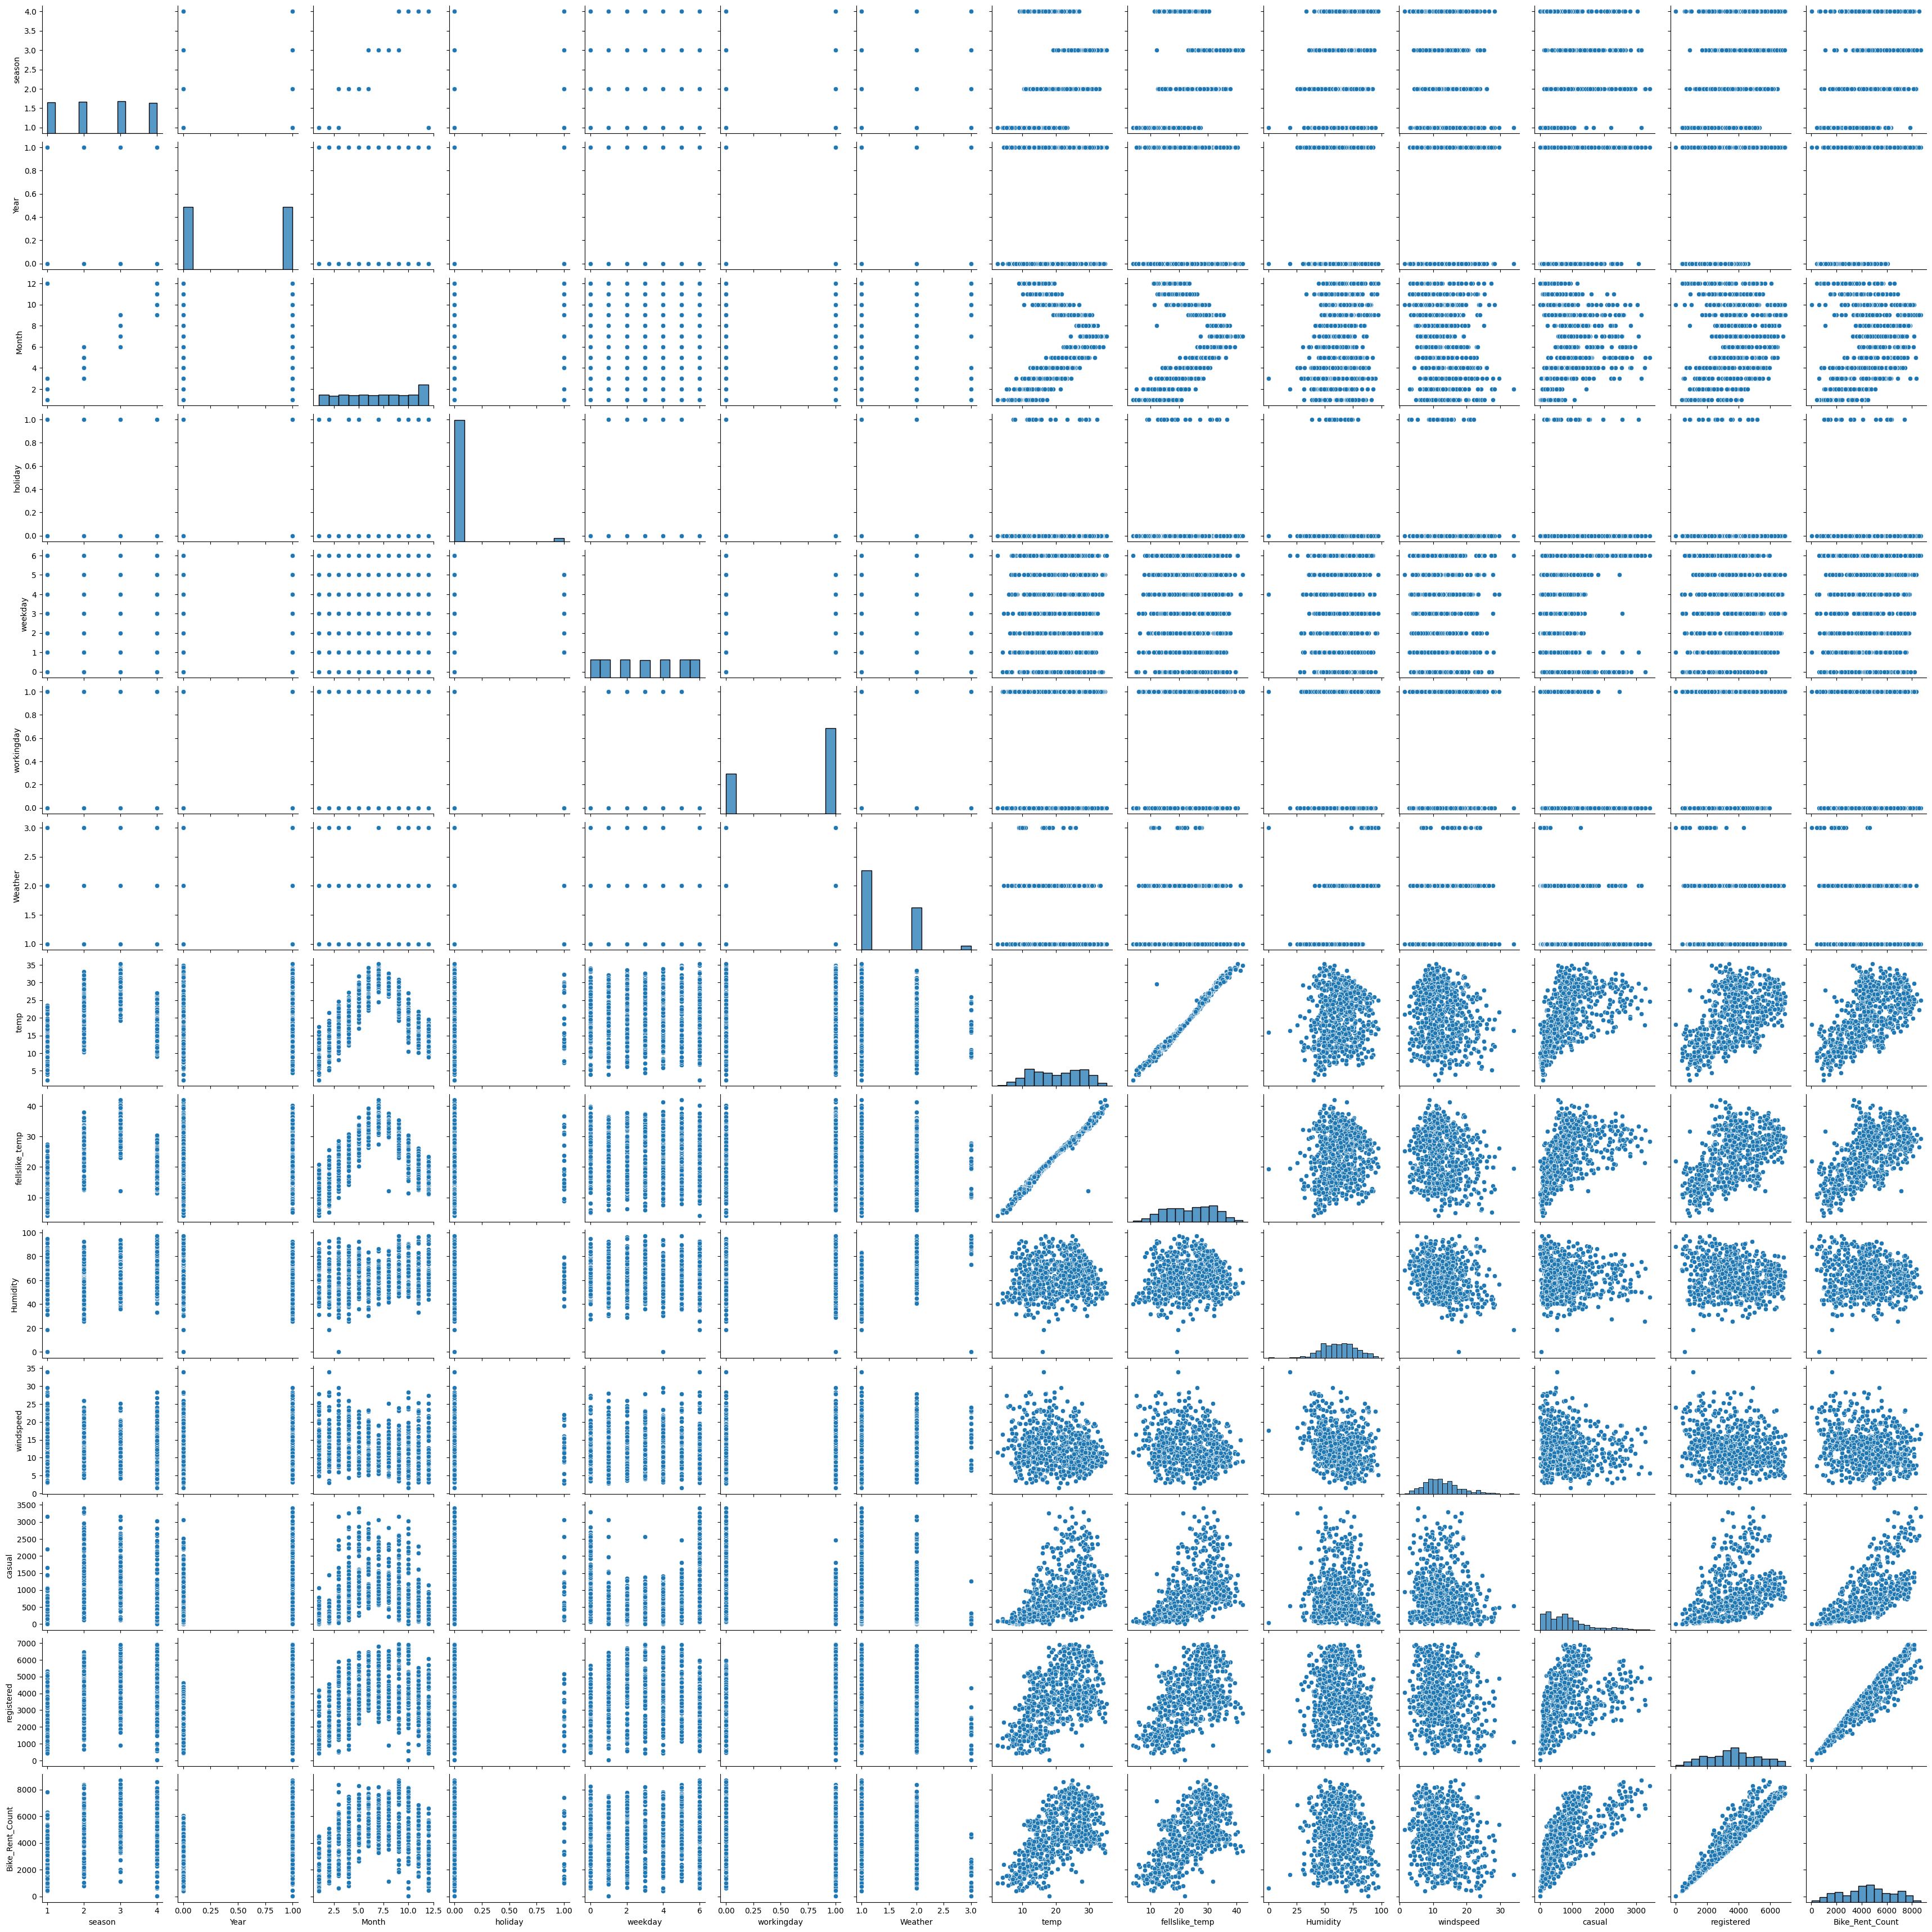

In [7]:
# Plot the pairplot

sns.pairplot(df_BoomBikes)

plt.show()


Based on Pair plot it is clear that, Registered user , Causual User , Temp and feelslikeTemp has clear pattern of linear regression



### Ploting heatmap to understand the correlations

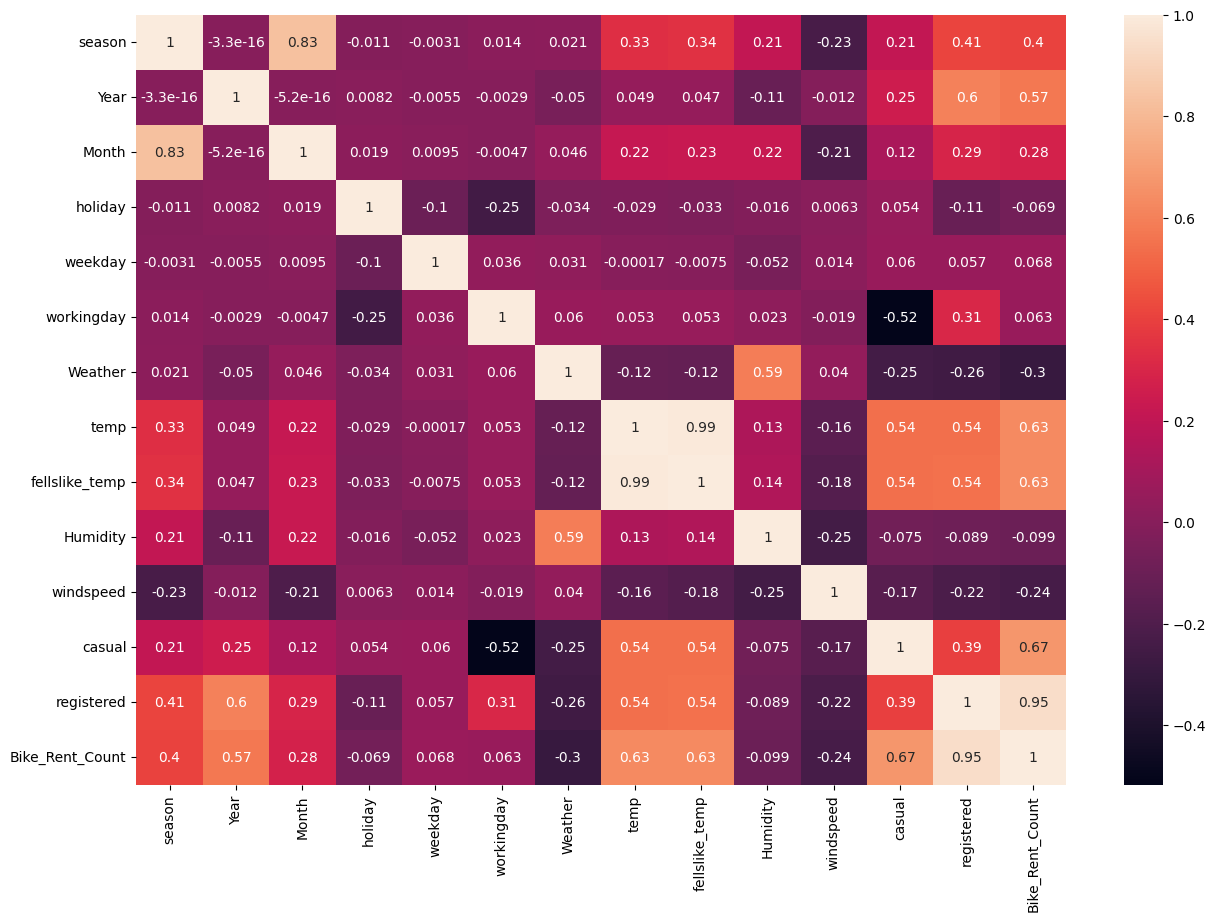

In [8]:
# Creating a heatmap for all variable
plt.figure(figsize=(15,10))
sns.heatmap(df_BoomBikes.corr(),annot=True)
plt.show()

### Mapping numeric value to categoric value to understand the trend

In [9]:
#mapping categorical variables with their subcategories to help with visualization analysis
df_BoomBikes['season']=df_BoomBikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df_BoomBikes['Month']=df_BoomBikes.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_BoomBikes['Weather']=df_BoomBikes.Weather.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df_BoomBikes['weekday']=df_BoomBikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


df_BoomBikes.head()

,season,Year,Month,holiday,weekday,workingday,Weather,temp,fellslike_temp,Humidity,windspeed,casual,registered,Bike_Rent_Count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


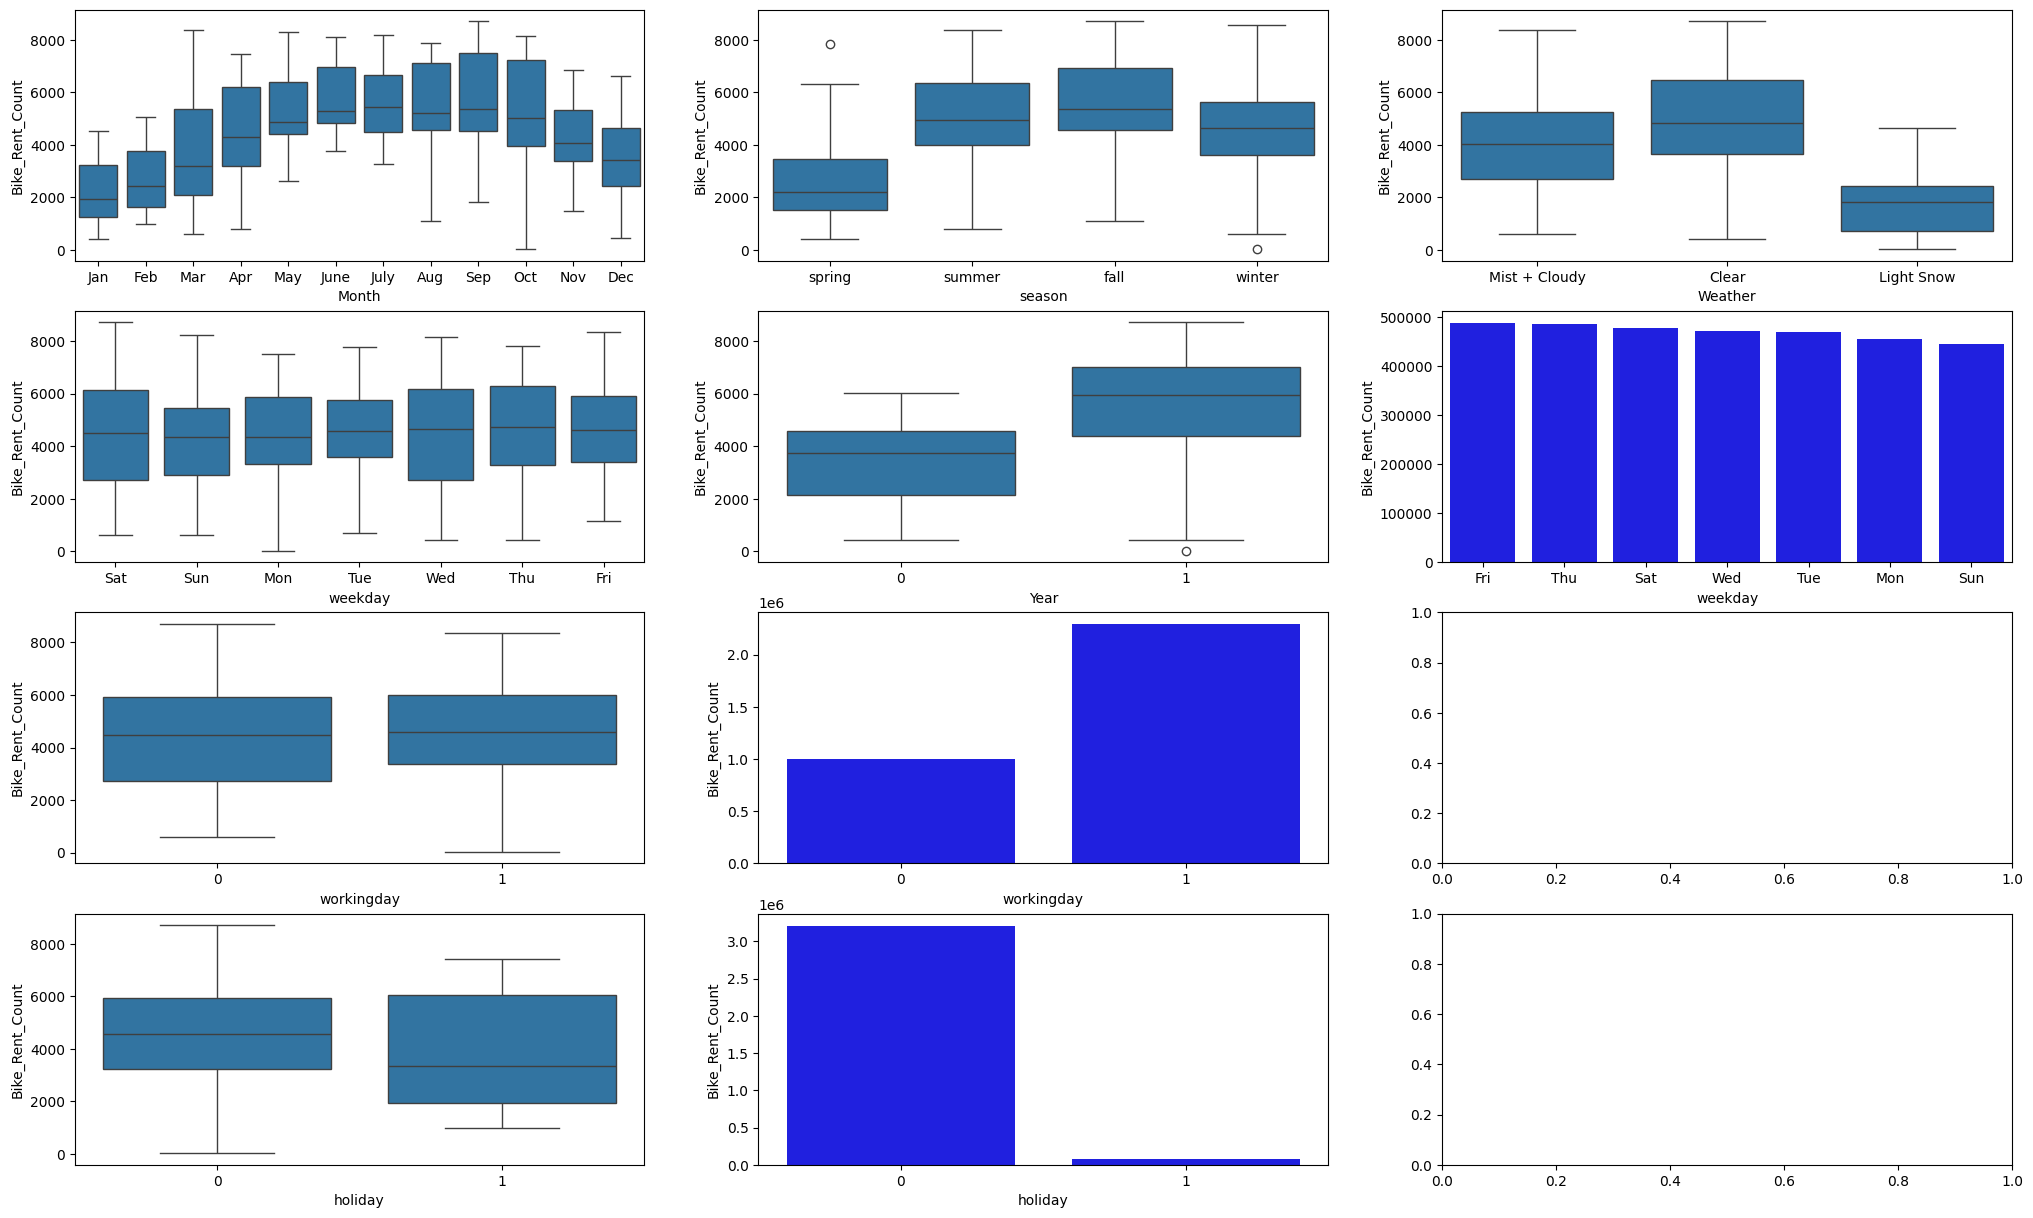

In [10]:
fig,ax = plt.subplots(ncols=3,nrows=4, figsize=(25,15),sharex=False,sharey=False)
# Creating Box plot for Bike_Rent_Cout for season, month, weekday, weather , year, workingday and holiday the every categorical data

# First row plotting on Month, Season, Weather
sns.boxplot(x='Month',y='Bike_Rent_Count',data=df_BoomBikes,ax=ax[0,0])
sns.boxplot(x='season',y='Bike_Rent_Count',data=df_BoomBikes,ax=ax[0,1])
sns.boxplot(x='Weather',y='Bike_Rent_Count',data=df_BoomBikes,ax=ax[0,2])

# 2nd row plotting on weekday and Year
sns.boxplot(x='weekday',y='Bike_Rent_Count',data=df_BoomBikes,ax=ax[1,0])
sns.boxplot(x='Year',y='Bike_Rent_Count',data=df_BoomBikes,ax=ax[1,1])
# create sns barplot using cumumulative sum of weekday category
df_weekday_cum = df_BoomBikes.groupby('weekday')['Bike_Rent_Count'].sum()
df_weekday_cum = df_weekday_cum.sort_values(ascending=False)
sns.barplot(data=df_weekday_cum,color='b', ax=ax[1,2])

# 3rd row plotting on working day
sns.boxplot(x='workingday',y='Bike_Rent_Count',data=df_BoomBikes,ax=ax[2,0])
# create sns barplot using cumumulative sum of workingday category
df_workingday_cum = df_BoomBikes.groupby('workingday')['Bike_Rent_Count'].sum()
df_workingday_cum = df_workingday_cum.sort_values(ascending=False)
sns.barplot(data=df_workingday_cum,color='b', ax=ax[2,1])

# 4th row plotting on Holiday
sns.boxplot(x='holiday',y='Bike_Rent_Count',data=df_BoomBikes,ax=ax[3,0])
# create sns barplot using cumumulative sum of holiday category
df_holiday_cum = df_BoomBikes.groupby('holiday')['Bike_Rent_Count'].sum()
df_holiday_cum = df_holiday_cum.sort_values(ascending=False)
sns.barplot(data=df_holiday_cum,color='b', ax=ax[3,1])

plt.show()
#



1.   1st row of the graph on *month , season and weathe*r it is clear that bike is rented more in ***`warm weather`*** which is `correlated` with ***`feelslike temprature`*** hence we will `dropping these colum`n for this analysis
2.   2nd row `weekday average rent is almost same across the days` hence alomost no impact on the dependent variable , hence will be `dropping this column`
3.   *`2019`* has seen `*spike*` on bike rental
4.   `Workday has higher rented bike than non-working days`. Same trend is reflected for Holiday as well hence dropping holiday and `keeping only workday column`




### Droping the columns based on above finding

In [11]:
# Drop the column month, season, weather, weekday and holiday
df_BoomBikes.drop(['Month','season','Weather','weekday','holiday'],axis=1,inplace=True)
# From early heatmap graph it is evident that temp and feelslike is highly correlated hence dropping teap column
df_BoomBikes.drop('temp',axis=1,inplace=True)
df_BoomBikes.head()

,Year,workingday,fellslike_temp,Humidity,windspeed,casual,registered,Bike_Rent_Count
0,0,0,18.18125,80.5833,10.749882,331,654,985
1,0,0,17.68695,69.6087,16.652113,131,670,801
2,0,1,9.47025,43.7273,16.636703,120,1229,1349
3,0,1,10.60610,59.0435,10.739832,108,1454,1562
4,0,1,11.46350,43.6957,12.522300,82,1518,1600


### Creating heatmap of the remaining column

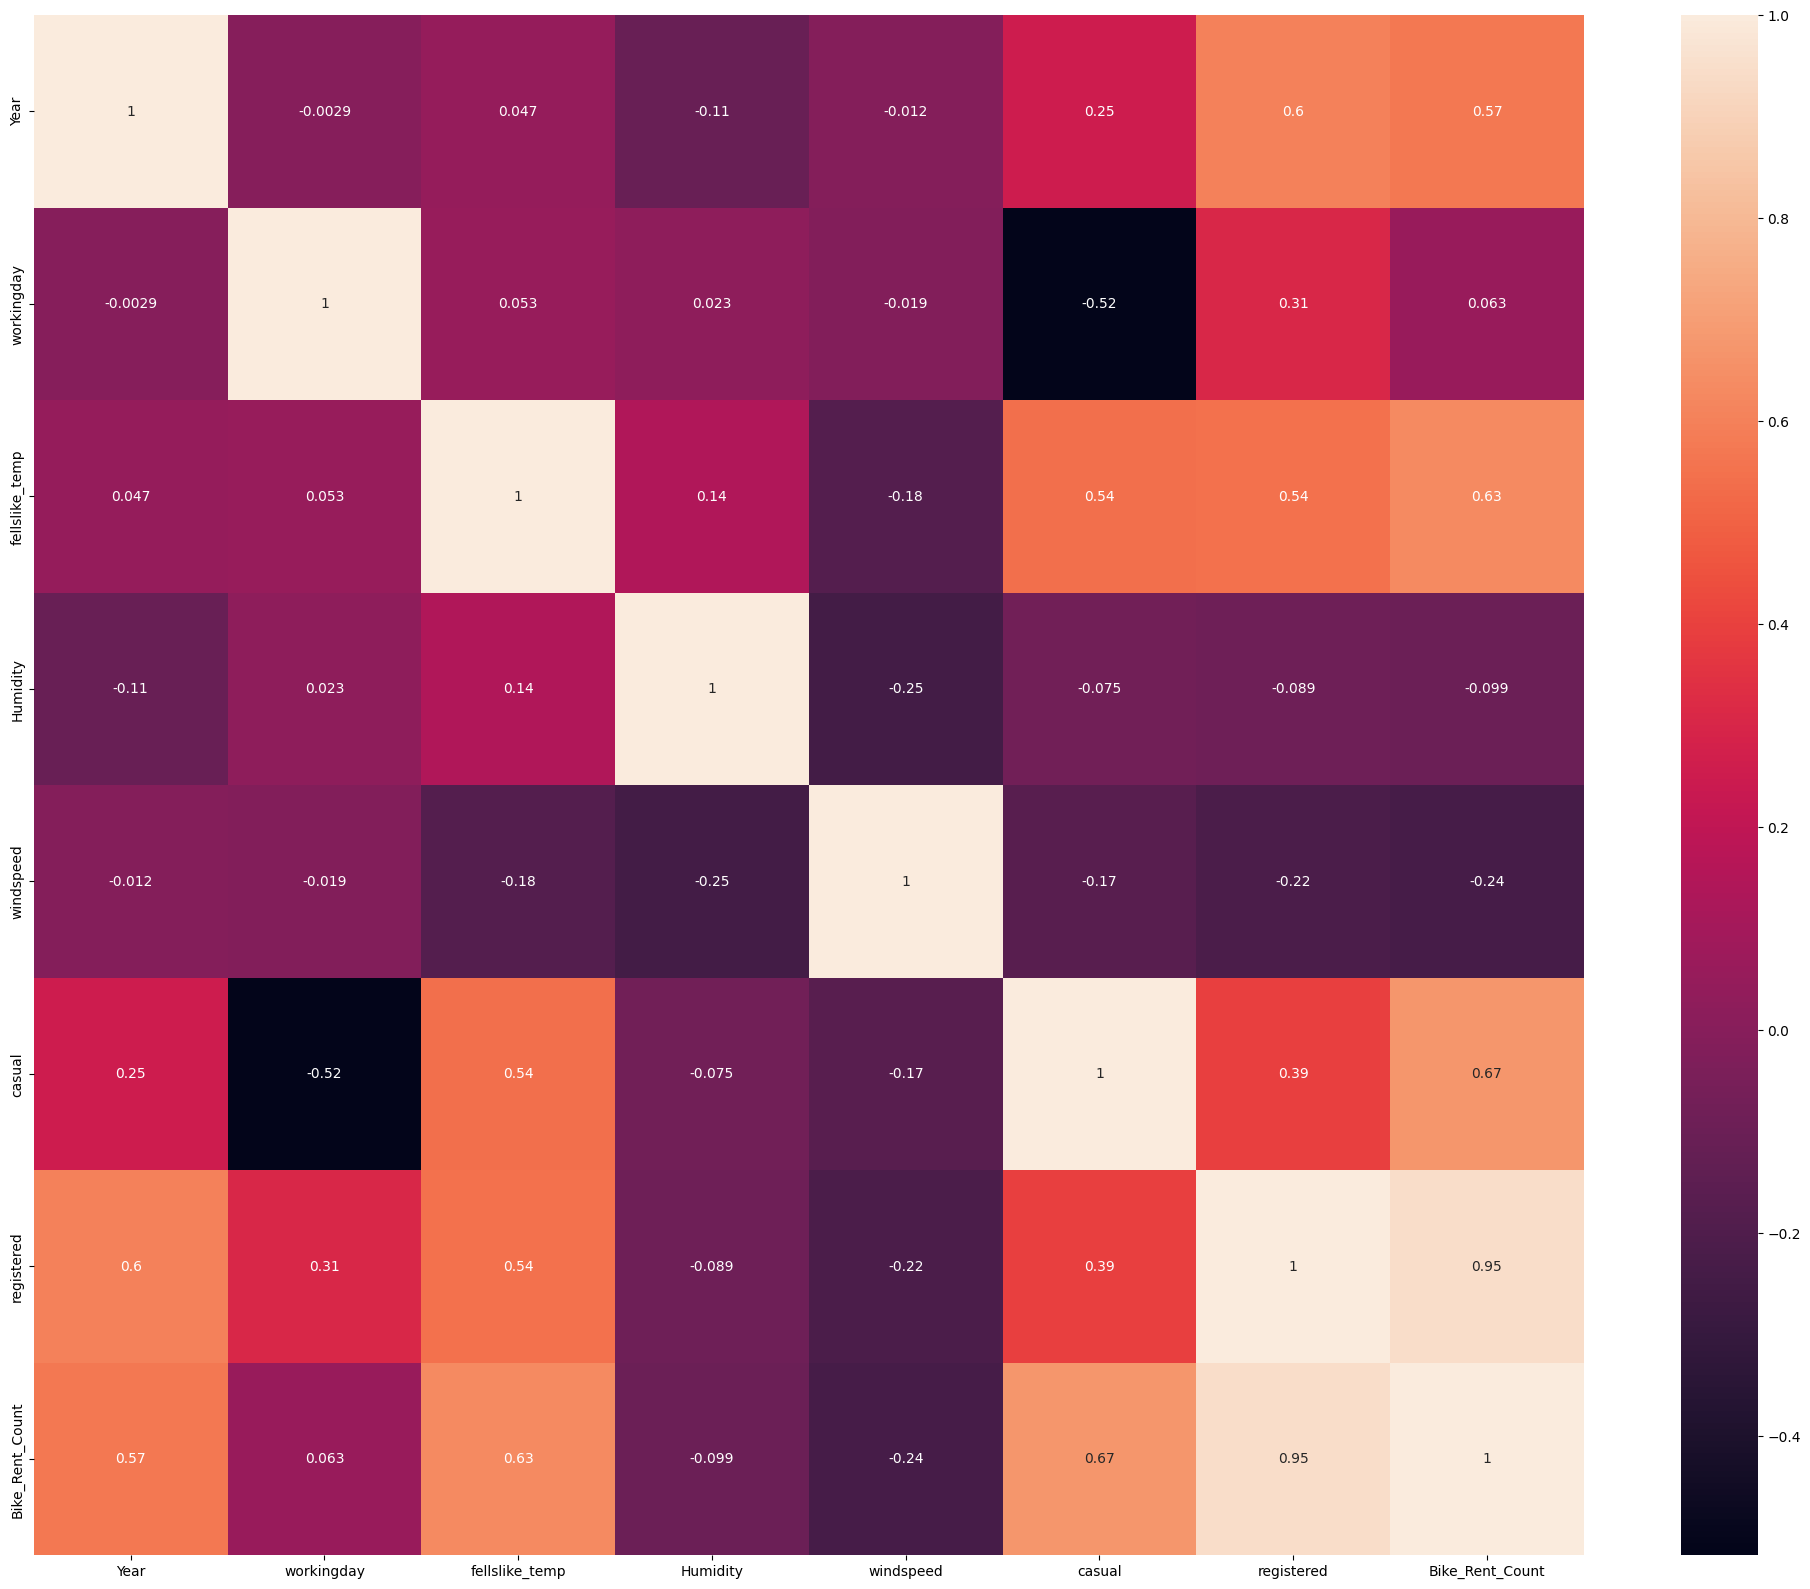

In [12]:
# Creating a heatmap for all variable
plt.figure(figsize=(25,20))
sns.heatmap(df_BoomBikes.corr(),annot=True)
plt.show()

Based on heat map It is clear that


1.   Registered and Casual user are correlated with each other with 0.39 correlation coefficient. Hence considering both `**Registered**` user and `**Causal**` user only for the linear regression
2.   Temp and Feelslike Temp both are highly correlated with Registered and Causal user hence will not consider for linear regression model
3. Year correlation coefficient with Registered user is 0.6 hence dropping them from Linear Regression model.
4. `**windspeed**` and `**humudity**` has less correlation with anyone hence considering for linear regression model
5. `**weather**` , `**workingday**`, `**weekday**` and `**holiday**` has very less correlation hence considering for the model.




## STEP-3 : Preparing the data model

In [13]:
# Splitting between train and test
df_BoomBikes_train,df_BoomBikes_test=train_test_split(df_BoomBikes,test_size=0.3,random_state=100)
print(df_BoomBikes_train.shape)
print(df_BoomBikes_test.shape)


(511, 8)
(219, 8)


### Scaling the variables based on min-max

In [14]:

# Scaling X_train for temp	fellslike_temp	Humidity	windspeed	casual	registered column
num_scale_var = ['fellslike_temp','Humidity','windspeed','casual','registered','Bike_Rent_Count']

# Fit Transform the num_scale_variable
scaler=MinMaxScaler()
df_BoomBikes_train[num_scale_var]=scaler.fit_transform(df_BoomBikes_train[num_scale_var])

# Tranform X_test
df_BoomBikes_test[num_scale_var]=scaler.transform(df_BoomBikes_test[num_scale_var])
print('###########################Train data details after scale#############################')
print("\n")
print(df_BoomBikes_train.describe())
print("\n")
print('###########################Test data details after scale#############################')
print("\n")
print(df_BoomBikes_test.describe())


###########################Train data details after scale#############################


             Year  workingday  fellslike_temp    Humidity   windspeed  \
count  511.000000  511.000000      511.000000  511.000000  511.000000   
mean     0.508806    0.677104        0.513133    0.650333    0.320844   
std      0.500412    0.468042        0.212202    0.145741    0.169639   
min      0.000000    0.000000        0.000000    0.000000    0.000000   
25%      0.000000    0.000000        0.332910    0.538858    0.199179   
50%      1.000000    1.000000        0.529300    0.653499    0.298098   
75%      1.000000    1.000000        0.688457    0.754401    0.414438   
max      1.000000    1.000000        1.000000    1.000000    1.000000   

           casual  registered  Bike_Rent_Count  
count  511.000000  511.000000       511.000000  
mean     0.254739    0.524618         0.514186  
std      0.205816    0.228459         0.224737  
min      0.000000    0.000000         0.000000  
25%     

### Generating X and Y variable for the Multivariable linear regression model

In [15]:
# Creating X and y variable for bootom up approach
y_train = df_BoomBikes_train.pop('Bike_Rent_Count')
X_train_all = df_BoomBikes_train

### Model-1: Using all variable

In [16]:
# Create linear equation with statsmodel
X_train_sm_all = sm.add_constant(X_train_all)
lr_all = sm.OLS(y_train, X_train_sm_all).fit()
print(lr_all.params)


const             3.174544e-16
Year              2.775558e-17
workingday        1.240327e-16
fellslike_temp   -5.447032e-16
Humidity         -1.552578e-16
windspeed         2.168404e-16
casual            3.774735e-01
registered        7.968247e-01
dtype: float64


In [17]:
print(lr_all.summary())

                            OLS Regression Results                            
Dep. Variable:        Bike_Rent_Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.336e+31
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:05:36   Log-Likelihood:                 17726.
No. Observations:                 511   AIC:                        -3.544e+04
Df Residuals:                     503   BIC:                        -3.540e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.175e-16   6.37e-17      4.

In [18]:
vif=pd.DataFrame()
vif['Features']=X_train_all.columns
# Calculate VIF for each feature
vif['VIF'] = [variance_inflation_factor(X_train_all.values, i) for i in range(X_train_all.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

         Features    VIF
6      registered  26.58
2  fellslike_temp  16.78
3        Humidity   8.99
1      workingday   8.45
5          casual   8.33
0            Year   4.44
4       windspeed   3.49




Follwing the guidence of
1) HIGH p and High VIF
2) High p and low VIF
3) low p and High VIF
4) low p and low VIF

Removing workingday column having p value as 0.588 and VIF as 8.53


### Model-2 : Dropiing workingdays based on VIF and p value analysis

In [19]:
# create model after removing weekday
X_Train_min_week = X_train_all.drop('workingday',axis=1)
X_train_sm_min_week = sm.add_constant(X_Train_min_week)
lr_min_week = sm.OLS(y_train, X_train_sm_min_week).fit()
print(lr_min_week.params)

const             1.006140e-16
Year              1.136244e-16
fellslike_temp   -7.060325e-16
Humidity         -5.204170e-18
windspeed        -2.966377e-16
casual            3.774735e-01
registered        7.968247e-01
dtype: float64


In [20]:
lr_min_week.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Bike_Rent_Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.562e+32
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:05:36   Log-Likelihood:                 17846.
No. Observations:                 511   AIC:                        -3.568e+04
Df Residuals:                     504   BIC:                        -3.565e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.006e-16   4.95e-17      2.034      0.042    3.44e-18    1.98e-16
Year            1.136e-16   2.12e-17      5.366      0.000     7.2e-17    1.55e-16
fellslike_temp  -7.06e-16   5.37e-17    -13.149      0.000   -8.12e-16   -6.01e-16
Humidity       -5.204e-18   5.53e-17     -0.094      0.925   -1.14e-16    1.03e-16
windspeed      -2.966e-16   4.78e-17     -6.201      0.000   -3.91e-16   -2.03e-16
casual             0.3775   4.54e-17   8.32e+15      0.000       0.377       0.377
registered         0.7968   5.61e-17   1.42e+16      0.000       0.797       0.797
==============================================================================
Omnibus:                        2.094   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.842
Skew:                           0.030   Prob(JB):                        0.398
Kurtosis:                       2.712   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
vif=pd.DataFrame()
vif['Features']=X_Train_min_week.columns
# Calculate VIF for each feature
vif['VIF'] = [variance_inflation_factor(X_Train_min_week.values, i) for i in range(X_Train_min_week.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

         Features    VIF
1  fellslike_temp  16.43
5      registered  16.23
2        Humidity   8.55
0            Year   4.13
4          casual   3.99
3       windspeed   3.41


Follwing the guidence of 1) HIGH p and High VIF 2) High p and low VIF 3) low p and High VIF 4) low p and low VIF

Removing humudity column having p value as 0.091 and VIF as 10.49

### Model3: Removing Humidity based on VIF and p value analysis

In [22]:

X_Train_min_week_hum = X_Train_min_week.drop('Humidity',axis=1)
X_train_sm_min_week_hum = sm.add_constant(X_Train_min_week_hum)
lr_min_week_hum = sm.OLS(y_train, X_train_sm_min_week_hum).fit()
print(lr_min_week_hum.params)

const             2.749537e-16
Year             -1.266348e-16
fellslike_temp   -1.960238e-16
windspeed         2.393918e-16
casual            3.774735e-01
registered        7.968247e-01
dtype: float64


In [23]:
lr_min_week_hum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Bike_Rent_Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.050e+30
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:05:36   Log-Likelihood:                 17041.
No. Observations:                 511   AIC:                        -3.407e+04
Df Residuals:                     505   BIC:                        -3.405e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            2.75e-16   1.39e-16      1.979      0.048    2.02e-18    5.48e-16
Year           -1.266e-16   1.01e-16     -1.249      0.212   -3.26e-16    7.26e-17
fellslike_temp  -1.96e-16   2.47e-16     -0.793      0.428   -6.82e-16     2.9e-16
windspeed       2.394e-16    2.2e-16      1.088      0.277   -1.93e-16    6.72e-16
casual             0.3775   2.15e-16   1.76e+15      0.000       0.377       0.377
registered         0.7968   2.63e-16   3.03e+15      0.000       0.797       0.797
==============================================================================
Omnibus:                        3.919   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.951
Skew:                           0.023   Prob(JB):                        0.229
Kurtosis:                       2.631   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
vif=pd.DataFrame()
vif['Features']=X_Train_min_week_hum.columns
# Calculate VIF for each feature
vif['VIF'] = [variance_inflation_factor(X_Train_min_week_hum.values, i) for i in range(X_Train_min_week_hum.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

         Features    VIF
4      registered  15.84
1  fellslike_temp  13.64
0            Year   4.13
3          casual   3.94
2       windspeed   2.72


Follwing the guidence of 1) HIGH p and High VIF 2) High p and low VIF 3) low p and High VIF 4) low p and low VIF

Removing feelsliketemp column having p value as 0.000 and VIF as 17.21

### Model-4: Removing feelslike temprature based on VIF and p analysis

In [25]:
X_Train_min_week_hum_feel = X_Train_min_week_hum.drop('fellslike_temp',axis=1)
X_train_sm_min_week_hum_feel = sm.add_constant(X_Train_min_week_hum_feel)
lr_min_week_hum_feel = sm.OLS(y_train, X_train_sm_min_week_hum_feel).fit()
print(lr_min_week_hum_feel.params)

const         3.642919e-17
Year          2.962040e-16
windspeed    -4.787837e-16
casual        3.774735e-01
registered    7.968247e-01
dtype: float64


In [26]:
lr_min_week_hum_feel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Bike_Rent_Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.340e+32
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:05:36   Log-Likelihood:                 17845.
No. Observations:                 511   AIC:                        -3.568e+04
Df Residuals:                     506   BIC:                        -3.566e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.643e-17   2.74e-17      1.328      0.185   -1.75e-17    9.03e-17
Year        2.962e-16   1.91e-17     15.517      0.000    2.59e-16    3.34e-16
windspeed  -4.788e-16   4.56e-17    -10.496      0.000   -5.68e-16   -3.89e-16
casual         0.3775   3.92e-17   9.63e+15      0.000       0.377       0.377
registered     0.7968   4.47e-17   1.78e+16      0.000       0.797       0.797
==============================================================================
Omnibus:                       23.779   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.905
Skew:                          -0.109   Prob(JB):                      0.00429
Kurtosis:                       2.319   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
vif=pd.DataFrame()
vif['Features']=X_Train_min_week_hum_feel.columns
# Calculate VIF for each feature
vif['VIF'] = [variance_inflation_factor(X_Train_min_week_hum_feel.values, i) for i in range(X_Train_min_week_hum_feel.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

     Features   VIF
3  registered  6.60
0        Year  3.18
2      casual  2.97
1   windspeed  2.43


Follwing the guidence of 1) HIGH p and High VIF 2) High p and low VIF 3) low p and High VIF 4) low p and low VIF

Removing windspeed column having p value as 0.332 and VIF as 2.97


### Model-5: Removing windspeed based on VIF and p value analysis

In [28]:
X_Train_min_week_hum_feel_wind = X_Train_min_week_hum_feel.drop('windspeed',axis=1)
X_train_sm_min_week_hum_feel_wind = sm.add_constant(X_Train_min_week_hum_feel_wind)
lr_min_week_hum_feel_wind = sm.OLS(y_train, X_train_sm_min_week_hum_feel_wind).fit()
print(lr_min_week_hum_feel_wind.params)
#

const         1.005055e-16
Year          2.545707e-16
casual        3.774735e-01
registered    7.968247e-01
dtype: float64


In [29]:
lr_min_week_hum_feel_wind.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Bike_Rent_Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.182e+32
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:05:36   Log-Likelihood:                 17919.
No. Observations:                 511   AIC:                        -3.583e+04
Df Residuals:                     507   BIC:                        -3.581e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.005e-16   1.64e-17      6.134      0.000    6.83e-17    1.33e-16
Year        2.546e-16   1.62e-17     15.732      0.000    2.23e-16    2.86e-16
casual         0.3775   3.36e-17   1.12e+16      0.000       0.377       0.377
registered     0.7968   3.74e-17   2.13e+16      0.000       0.797       0.797
==============================================================================
Omnibus:                        1.360   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.192
Skew:                           0.039   Prob(JB):                        0.551
Kurtosis:                       3.223   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
vif=pd.DataFrame()
vif['Features']=X_Train_min_week_hum_feel_wind.columns
# Calculate VIF for each feature
vif['VIF'] = [variance_inflation_factor(X_Train_min_week_hum_feel_wind.values, i) for i in range(X_Train_min_week_hum_feel_wind.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

     Features   VIF
2  registered  5.20
0        Year  3.18
1      casual  2.96


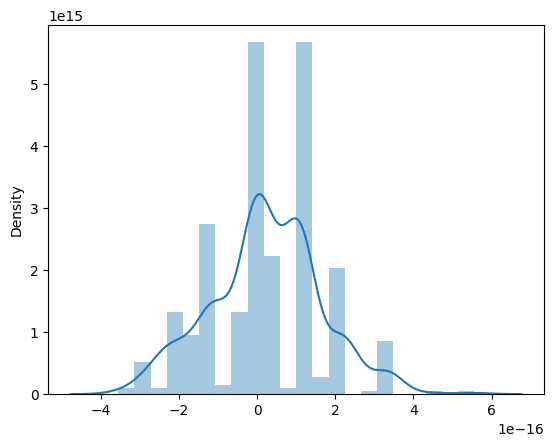

In [31]:
y_train_pred = lr_min_week_hum_feel_wind.predict(X_train_sm_min_week_hum_feel_wind)
residual = y_train - y_train_pred
sns.distplot(residual)
plt.show()

Based on this histogram the Model is very unstable hence dropping registered as it has high VIF

### Model-5:  Removing registered user based on p and VIF analysis

In [32]:
#Removing Registered user as registered as high VIF
X_Train_min_week_hum_feel_wind_reg = X_Train_min_week_hum_feel_wind.drop('registered',axis=1)
X_train_sm_min_week_hum_feel_wind_reg = sm.add_constant(X_Train_min_week_hum_feel_wind_reg)
lr_min_week_hum_feel_wind_reg = sm.OLS(y_train, X_train_sm_min_week_hum_feel_wind_reg).fit()
print(lr_min_week_hum_feel_wind_reg.params)



const     0.257359
Year      0.201811
casual    0.605107
dtype: float64


In [33]:
lr_min_week_hum_feel_wind_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Bike_Rent_Count   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     447.0
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          1.05e-112
Time:                        07:05:37   Log-Likelihood:                 297.62
No. Observations:                 511   AIC:                            -589.2
Df Residuals:                     508   BIC:                            -576.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2574      0.010     24.548      0.000       0.237       0.278
Year           0.2018      0.012     16.254      0.000       0.177       0.226
casual         0.6051      0.030     20.045      0.000       0.546       0.664
==============================================================================
Omnibus:                       17.469   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.943
Skew:                          -0.285   Prob(JB):                      0.00155
Kurtosis:                       2.468   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared has dropped to 0.6 from 1 after removing registeres user hence instead of registered user lets drop Causual users

### Model-6: Adding Registered user back and removing casual user as R-Square has reduced to 0.65

In [34]:
# Removing registered is reducing R-Square as 0.6 , hence removing casual instead of Registered
X_Train_min_week_hum_feel_wind_cas = X_Train_min_week_hum_feel_wind.drop('casual',axis=1)
X_train_sm_min_week_hum_feel_wind_cas = sm.add_constant(X_Train_min_week_hum_feel_wind_cas)
lr_min_week_hum_feel_wind_cas = sm.OLS(y_train, X_train_sm_min_week_hum_feel_wind_cas).fit()
print(lr_min_week_hum_feel_wind_cas.params)

const         0.025171
Year          0.002367
registered    0.929840
dtype: float64


In [35]:
lr_min_week_hum_feel_wind_cas.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Bike_Rent_Count   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     2278.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          2.18e-254
Time:                        07:05:37   Log-Likelihood:                 625.78
No. Observations:                 511   AIC:                            -1246.
Df Residuals:                     508   BIC:                            -1233.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0252      0.008      3.116      0.002       0.009       0.041
Year           0.0024      0.008      0.294      0.769      -0.013       0.018
registered     0.9298      0.018     52.714      0.000       0.895       0.964
==============================================================================
Omnibus:                      133.802   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.236
Skew:                           1.504   Prob(JB):                     1.02e-55
Kurtosis:                       4.685   Cond. No.                         7.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p of year is very high 0.769 hence dropping Year column as well

### Model-7 : Removing Year as well due to high VIF

In [36]:
# This has good R however Year has high p hence removing year
X_Train_min_week_hum_feel_wind_cas_year = X_Train_min_week_hum_feel_wind_cas.drop('Year',axis=1)
X_train_sm_min_week_hum_feel_wind_cas_year = sm.add_constant(X_Train_min_week_hum_feel_wind_cas_year)
lr_min_week_hum_feel_wind_cas_year = sm.OLS(y_train, X_train_sm_min_week_hum_feel_wind_cas_year).fit()
print(lr_min_week_hum_feel_wind_cas_year.params)

const         0.024686
registered    0.933060
dtype: float64


In [37]:
lr_min_week_hum_feel_wind_cas_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Bike_Rent_Count   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4565.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          2.69e-256
Time:                        07:05:37   Log-Likelihood:                 625.74
No. Observations:                 511   AIC:                            -1247.
Df Residuals:                     509   BIC:                            -1239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0247      0.008      3.124      0.002       0.009       0.040
registered     0.9331      0.014     67.561      0.000       0.906       0.960
==============================================================================
Omnibus:                      135.155   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.666
Skew:                           1.514   Prob(JB):                     1.12e-56
Kurtosis:                       4.711   Cond. No.                         5.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Density'>

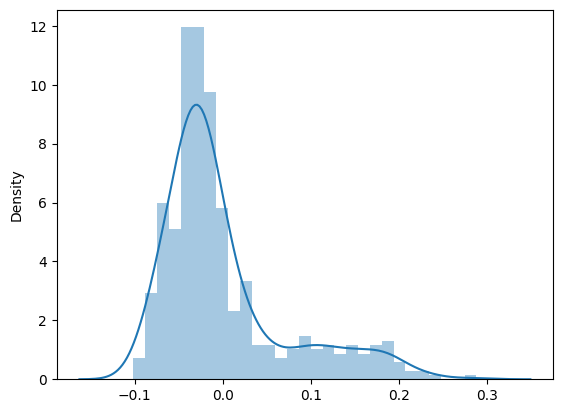

In [38]:
y_train_pred = lr_min_week_hum_feel_wind_cas_year.predict(X_train_sm_min_week_hum_feel_wind_cas_year)
residual = y_train - y_train_pred
sns.distplot(residual)

In [39]:
y_test = df_BoomBikes_test.pop('Bike_Rent_Count')
X_test_reg = df_BoomBikes_test[['registered']]
X_test_sm_reg = sm.add_constant(X_test_reg)
y_test_pred_reg = lr_min_week_hum_feel_wind_cas_year.predict(X_test_sm_reg)


In [40]:
''''
print("################R-Square for Train and Test##################")
print("r2 score Train", r2_score(y_train,y_train_pred))
print("r2 score Test", r2_score(y_test,y_test_pred_reg))
print("\n")
print("#############MSE for Train and Test###############")
print("MSE Train",  mean_squared_error(y_train,y_train_pred))
print("MSE Test" , mean_squared_error(y_test,y_test_pred_reg))
'''

'\'\nprint("################R-Square for Train and Test##################")\nprint("r2 score Train", r2_score(y_train,y_train_pred))\nprint("r2 score Test", r2_score(y_test,y_test_pred_reg))\nprint("\n")\nprint("#############MSE for Train and Test###############")\nprint("MSE Train",  mean_squared_error(y_train,y_train_pred))\nprint("MSE Test" , mean_squared_error(y_test,y_test_pred_reg))\n'

### Model-8 :Adding feelslike_temp back as normal distribution is not perfactly balanced and MSE is high

In [41]:
# MSE is very high hence adding back feelslike for linear regression model
X_Train_reg_feel = df_BoomBikes_train[['registered', 'fellslike_temp']]
X_train_sm_reg_feel = sm.add_constant(X_Train_reg_feel)
lr_reg_feel = sm.OLS(y_train, X_train_sm_reg_feel).fit()
print(lr_reg_feel.params)

const            -0.017612
registered        0.841149
fellslike_temp    0.176399
dtype: float64


In [42]:
lr_reg_feel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Bike_Rent_Count   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2870.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          1.51e-277
Time:                        07:05:38   Log-Likelihood:                 679.42
No. Observations:                 511   AIC:                            -1353.
Df Residuals:                     508   BIC:                            -1340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0176      0.008     -2.172      0.030      -0.034      -0.002
registered         0.8411      0.015     55.951      0.000       0.812       0.871
fellslike_temp     0.1764      0.016     10.899      0.000       0.145       0.208
==============================================================================
Omnibus:                      144.644   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.573
Skew:                           1.541   Prob(JB):                     1.98e-66
Kurtosis:                       5.170   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif=pd.DataFrame()
vif['Features']=X_Train_reg_feel.columns
# Calculate VIF for each feature
vif['VIF'] = [variance_inflation_factor(X_Train_reg_feel.values, i) for i in range(X_Train_reg_feel.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

         Features   VIF
0      registered  7.72
1  fellslike_temp  7.72


<Axes: ylabel='Density'>

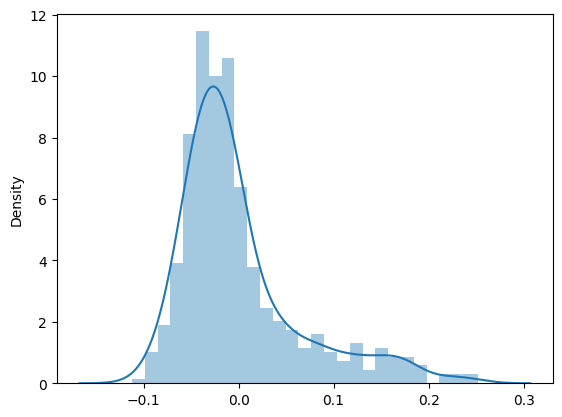

In [44]:
y_train_pred = lr_reg_feel.predict(X_train_sm_reg_feel)
residual = y_train - y_train_pred
sns.distplot(residual)

In [45]:
X_test_reg_feel = df_BoomBikes_test[['registered', 'fellslike_temp']]
X_test_sm_reg_feel = sm.add_constant(X_test_reg_feel)
y_test_pred_reg_feel = lr_reg_feel.predict(X_test_sm_reg_feel)


In [46]:
'''
print("################R-Square for Train and Test##################")
print("r2 score Train", r2_score(y_train,y_train_pred))
print("r2 score Test", r2_score(y_test,y_test_pred_reg_feel))
print("\n")
print("#############MSE for Train and Test###############")
print("MSE Train",  mean_squared_error(y_train,y_train_pred))
print("MSE Test" , mean_squared_error(y_test,y_test_pred_reg_feel))
'''

'\nprint("################R-Square for Train and Test##################")\nprint("r2 score Train", r2_score(y_train,y_train_pred))\nprint("r2 score Test", r2_score(y_test,y_test_pred_reg_feel))\nprint("\n")\nprint("#############MSE for Train and Test###############")\nprint("MSE Train",  mean_squared_error(y_train,y_train_pred))\nprint("MSE Test" , mean_squared_error(y_test,y_test_pred_reg_feel))\n'

### Model-9 Adding working day back as MSE is still high also normal distribution is not perfectly balanced

In [47]:
# Adding workday as well as it is one of influencer as per box chart
X_Train_reg_feel_work = df_BoomBikes_train[['registered', 'fellslike_temp','workingday']]
X_train_sm_reg_feel_work = sm.add_constant(X_Train_reg_feel_work)
lr_reg_feel_work = sm.OLS(y_train, X_train_sm_reg_feel_work).fit()
print(lr_reg_feel_work.params)

const             0.027911
registered        0.937678
fellslike_temp    0.134724
workingday       -0.110440
dtype: float64


In [48]:
lr_reg_feel_work.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Bike_Rent_Count   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     4625.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:05:39   Log-Likelihood:                 892.94
No. Observations:                 511   AIC:                            -1778.
Df Residuals:                     507   BIC:                            -1761.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0279      0.006      4.957      0.000       0.017       0.039
registered         0.9377      0.011     88.501      0.000       0.917       0.958
fellslike_temp     0.1347      0.011     12.486      0.000       0.114       0.156
workingday        -0.1104      0.004    -25.736      0.000      -0.119      -0.102
==============================================================================
Omnibus:                       75.586   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.981
Skew:                           0.888   Prob(JB):                     2.19e-29
Kurtosis:                       4.744   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif=pd.DataFrame()
vif['Features']=X_Train_reg_feel_work.columns
# Calculate VIF for each feature
vif['VIF'] = [variance_inflation_factor(X_Train_reg_feel_work , i) for i in range(X_Train_reg_feel_work.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

         Features   VIF
0      registered  9.87
1  fellslike_temp  7.72
2      workingday  3.21


<Axes: ylabel='Density'>

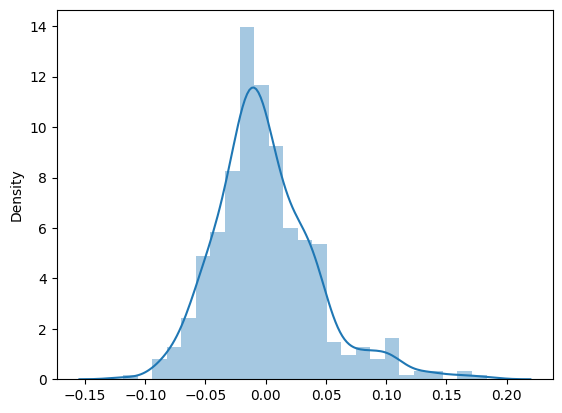

In [50]:
y_train_pred = lr_reg_feel_work.predict(X_train_sm_reg_feel_work)
residual = y_train - y_train_pred
sns.distplot(residual)

In [51]:
X_test_reg_feel_work = df_BoomBikes_test[['registered', 'fellslike_temp','workingday']]
X_test_sm_reg_feel_work = sm.add_constant(X_test_reg_feel_work)
y_test_pred_reg_feel_work = lr_reg_feel_work.predict(X_test_sm_reg_feel_work)

In [52]:
print("################R-Square for Train and Test##################")
print("r2 score Train", r2_score(y_train,y_train_pred))
print("r2 score Test", r2_score(y_test,y_test_pred_reg_feel_work))
print("\n")
print("#############MSE for Train and Test###############")
print("MSE Train",  mean_squared_error(y_train,y_train_pred))
print("MSE Test" , mean_squared_error(y_test,y_test_pred_reg_feel_work))

################R-Square for Train and Test##################
r2 score Train 0.964744321166166
r2 score Test 0.9535844789258889


#############MSE for Train and Test###############
MSE Train 0.0017771637732170915
MSE Test 0.0022045426841314146


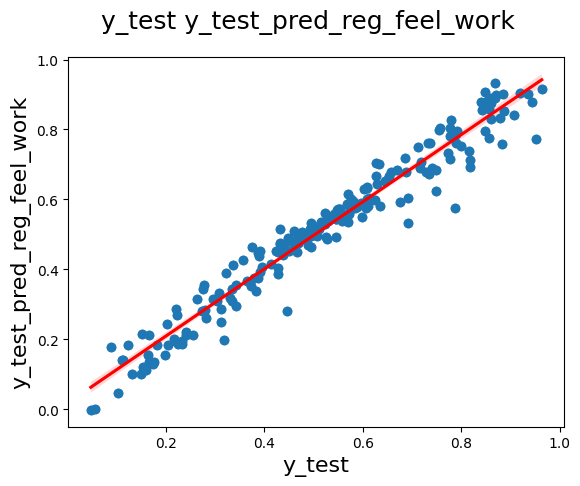

In [53]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred_reg_feel_work, fit_reg=True, line_kws={"color": "r"})
plt.scatter(y_test, y_test_pred_reg_feel_work)
fig.suptitle('y_test y_test_pred_reg_feel_work', fontsize = 18)
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_test_pred_reg_feel_work', fontsize = 16)
plt.show()

## Final Model is
# Bike_rent_count = 0.027911 + 0.937678 * registered + 0.134724 * fellslike_temp - 110440 * workingday

const             =  0.027911,
registered        =  0.937678,
fellslike_temp    =  0.134724 &
workingday        = -0.110440

### Summary
1. Based on current model number of registered user , feelslike temprature and working day are the key driver for the number of bike to get rented
2. R2 score  for Train 0.9647 and R2 Score for Test is 0.9535, which means the variance is less than 4% and it's a good model. This is also reflected in Normal Distribution model for Train data
3. Based on this our recommendation is to run marketing campaign during warm wather & on workdays , provide benefits for becoming the registered user